In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
from sklearn import datasets
import seaborn as sns
import matplotlib as mplt
import random
from matplotlib.animation import FuncAnimation
sns.set()
RandomState = 21521109 

In [17]:
import os
KmeanFigName = 'KmeansFig'
if (os.path.exists(KmeanFigName) == False):
    os.mkdir(KmeanFigName)


In [18]:
colors = sns.color_palette("Paired").as_hex()
print(colors)

['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928']


In [19]:

class KMeansClustering:
    def __init__(self, X, num_clusters, Inits = None, SaveFig = True):
        self.K = num_clusters # cluster number
        self.max_iterations = 100 # max iteration. don't want to run inf time
        self.num_examples, self.num_features = X.shape # num of examples, num of features
        self.plot_figure = True # plot figure
        self.Inits = Inits
        self.SaveFig = SaveFig
        
    # randomly initialize centroids
    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero 
        for k in range(self.K): # iterations of 
            centroid = X[np.random.choice(range(self.num_examples))] # random centroids
            centroids[k] = centroid
        return centroids # return random centroids
    
    # create cluster Function
    def create_cluster(self, X, centroids):
        clusters = [[] for _ in range(self.K)]
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point-centroids)**2, axis=1))
            ) # closest centroid using euler distance equation(calculate distance of every point from centroid)
            clusters[closest_centroid].append(point_idx)
        return clusters 
    
    # new centroids
    def calculate_new_centroids(self, cluster, X):
        centroids = np.zeros((self.K, self.num_features)) # row , column full with zero
        for idx, cluster in enumerate(cluster):
            new_centroid = np.mean(X[cluster], axis=0) # find the value for new centroids
            centroids[idx] = new_centroid
        return centroids
    
    # prediction
    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.num_examples) # row1 fillup with zero
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred
    
    # plotinng scatter plot
    # fit data
    def fit(self, X):
        if (self.Inits == None):
            centroids = self.initialize_random_centroids(X) # initialize random centroids
        else:
            centroids = self.Inits
        for step in range(self.max_iterations):

            clusters = self.create_cluster(X, centroids) # create cluster
            previous_centroids = centroids
            centroids2 = np.array(centroids)
            if (self.SaveFig):
                plt.clf()
                plt.xlim(-15,15)
                plt.ylim(-15,15)
                plt.title(f"Kmeans step {step+1}")
                plt.scatter(X[:,0], X[:,1],c = self.predict_cluster(clusters, X),cmap=mplt.colors.ListedColormap(colors))
                plt.scatter(centroids2[:,0], centroids2[:,1], marker = 'X', s = 100, color = 'red')
                figname = f'{KmeanFigName}/KmeansStep{step+1}.png' 
                plt.savefig(fname = figname, dpi=500, transparent=False,bbox_inches='tight')
            centroids = self.calculate_new_centroids(clusters, X) # calculate new centroids
            diff = centroids - previous_centroids # calculate difference
            if not diff.any():
                break
        self.centroids = centroids
        self.labels_ = self.predict_cluster(clusters, X) # predict function

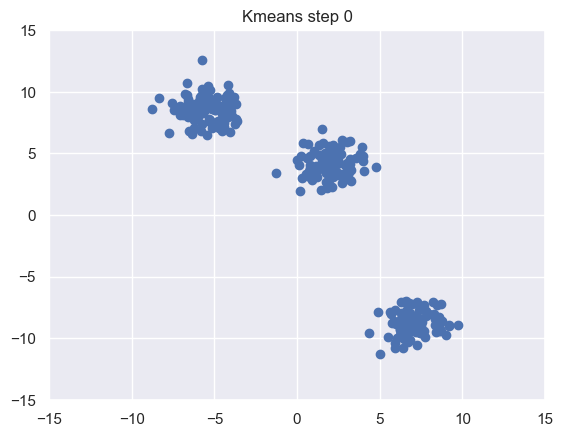

In [20]:
X,y = datasets.make_blobs(n_samples=[100, 100, 100], n_features=2, random_state=215211) 
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.title("Kmeans step 0")
plt.scatter(X[:,0], X[:,1])
plt.savefig(fname = f'{KmeanFigName}/KmeansStep0', dpi=500, transparent=False,bbox_inches='tight')

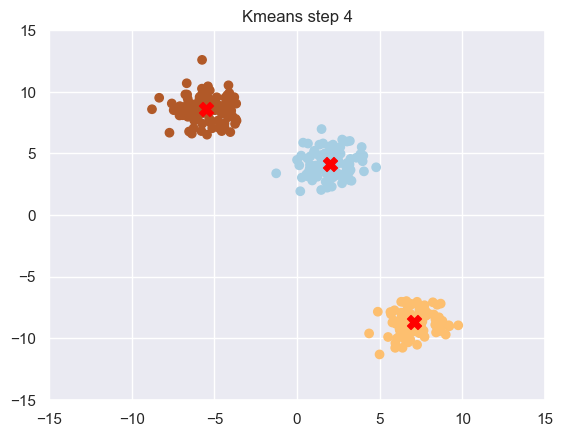

In [21]:
kMeans = KMeansClustering(X, num_clusters=3,Inits=[[10,10],[-7.5,-10], [-2.5,10]])
kMeans.fit(X)
centers =  kMeans.centroids
centers = np.array(centers)

[[ 1.98284043  4.13967618]
 [ 7.09145666 -8.72334939]
 [-5.53710145  8.58541381]]


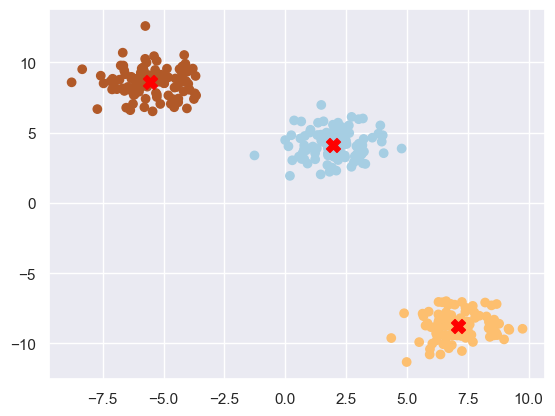

In [22]:
print(centers)
plt.scatter(X[:,0], X[:,1],c = kMeans.labels_,cmap=mplt.colors.ListedColormap(colors))
plt.scatter(centers[:,0], centers[:,1], marker = 'X', s = 100, color = 'red')
plt.savefig(fname = 'KmeansRightCentroid.png', dpi=300, transparent=False,bbox_inches='tight')
plt.show()